# **23. Ensemble Methods in Python**

## Chapter 1 - Combining Multiple Models

Do you struggle to determine which of the models you built is the best for your problem? You should give up on that, and use them all instead! In this chapter, you'll learn how to combine multiple models into one using "Voting" and "Averaging". You'll use these to predict the ratings of apps on the Google Play Store, whether or not a Pokémon is legendary, and which characters are going to die in Game of Thrones!



### Exploring Google apps data

The first dataset you'll work with contains information about the ratings of around 10,800 apps on the Google Play store. It has been preloaded into a DataFrame called ratings. There are 13 features that describe a given app, such as 'Category' and 'Price'. The goal is to use this information to predict the rating of an app, which can range from 1 to 5.

Before doing that, it's a good idea to familiarize yourself with the dataset using pandas methods such as .head() and .describe(). Explore the data in the IPython Shell and select the incorrect statement from the options below.

In [1]:
import pandas as pd   
import numpy as np

df = pd.read_csv('googleplaystore.csv')
df.head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [2]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Predicting the rating of an app

Having explored the Google apps dataset in the previous exercise, let's now build a model that predicts the rating of an app given a subset of its features.

To do this, you'll use scikit-learn's DecisionTreeRegressor. As decision trees are the building blocks of many ensemble models, refreshing your memory of how they work will serve you well throughout this course.

We'll use the MAE (mean absolute error) as the evaluation metric. This metric is highly interpretable, as it represents the average absolute difference between actual and predicted ratings.

All required modules have been pre-imported for you. The features and target are available in the variables X and y, respectively.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('googleplaystore.csv')

# Define features (X) and target variable (y)
X = df[['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']]
y = df['Rating']

# Split into train (80%) and test(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the regressor
reg_dt = DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=9, random_state=500)

# Fit to the training set
reg_dt.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = reg_dt.predict(X_test)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))


# <script.py> output:
#     MAE: 0.609

### Choosing the best model

In this exercise, you'll compare different classifiers and choose the one that performs the best.

The dataset here - already loaded and split into train and test sets - consists of Pokémon - their stats, types, and whether or not they're legendary. The objective of our classifiers is to predict this 'Legendary' variable.

Three individual classifiers have been fitted to the training set:

clf_lr is a logistic regression.
clf_dt is a decision tree.
clf_knn is a 5-nearest neighbors classifier.
As the classes here are imbalanced - only 65 of the 800 Pokémon in the dataset are legendary - we'll use F1-Score to evaluate the performance. Scikit-learn's f1_score() has been imported for you.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Define and instantiate classifiers
clf_lr = LogisticRegression()
clf_dt = DecisionTreeClassifier()
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Make the individual predictions
pred_lr = clf_lr.predict(X_test)
pred_dt = clf_dt.predict(X_test)
pred_knn = clf_knn.predict(X_test)

# Evaluate the performance of each model
score_lr = f1_score(y_test, pred_lr)
score_dt = f1_score(y_test, pred_dt)
score_knn = f1_score(y_test, pred_knn)

# Print the scores
print(score_lr)
print(score_dt)
print(score_knn)



script.py
123456789101112131415
# Make the invidual predictions
pred_lr = clf_lr.predict(X_test)
pred_dt = clf_dt.predict(X_test)
pred_knn = clf_knn.predict(X_test)

# Evaluate the performance of each model
score_lr = f1_score(y_test, pred_lr)
score_dt = f1_score(y_test, pred_dt)
score_knn = f1_score(y_test, pred_knn)

IPython Shell
Slides
# Make the invidual predictions
pred_lr = clf_lr.predict(X_test)
pred_dt = clf_dt.predict(X_test)
pred_knn = clf_knn.predict(X_test)

# Evaluate the performance of each model
score_lr = f1_score(y_test, pred_lr)
score_dt = f1_score(y_test, pred_dt)
score_knn = f1_score(y_test, pred_knn)


# Print the scores
print(score_lr)
print(score_dt)
print(score_knn)


# Logistic regression (clf_lr).
# Decision tree (clf_dt).
# 5-nearest neighbors (clf_knn).

# <script.py> output:
    # 0.5882352941176471
    # 0.5833333333333334
    # 0.47619047619047616


### Assembling your first ensemble

It's time to build your first ensemble model! The Pokémon dataset from the previous exercise has been loaded and split into train and test sets.

Your job is to leverage the voting ensemble technique using the sklearn API. It's up to you to instantiate the individual models and pass them as parameters to build your first voting classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Instantiate the individual models
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)

# Create and fit the voting classifier
clf_vote = VotingClassifier(
    estimators=[('knn', clf_knn), ('lr', clf_lr), ('dt', clf_dt)]
)
clf_vote.fit(X_train, y_train)




### Evaluating your ensemble

In the previous exercise, you built your first voting classifier. Let's now evaluate it and compare it to that of the individual models.

The individual models (clf_knn, clf_dt, and clf_lr) and the voting classifier (clf_vote) have already been loaded and trained.

Remember to use f1_score() to evaluate the performance. In addition, you'll create a classification report on the test set (X_test, y_test) using the classification_report() function.

Will your voting classifier beat the 58% F1-score of the decision tree?

In [ ]:
from sklearn.metrics import f1_score, classification_report

# Calculate the predictions using the voting classifier
pred_vote = clf_vote.predict(X_test)

# Calculate the F1-Score of the voting classifier
score_vote = f1_score(y_test, pred_vote)
print('F1-Score: {:.3f}'.format(score_vote))

# Calculate the classification report
report = classification_report(y_test, pred_vote)
print(report)

# <script.py> output:
#     F1-Score: 0.583
#                   precision    recall  f1-score   support
    
#            False       0.98      0.95      0.97       150
#             True       0.50      0.70      0.58        10
    
#         accuracy                           0.94       160
#        macro avg       0.74      0.83      0.77       160
#     weighted avg       0.95      0.94      0.94       160
    


### Journey to Westeros

If you're a Game of Thrones fan, you might already know all about the fictional world of Westeros and the characters that inhabit it. Regardless, it's important to explore a new dataset before doing any modeling. That's what you'll do now!

The dataset is loaded into the environment and available to you as got, the commonly used acronym for Game of Thrones.

The target variable here is 'actual'. It represents whether a character is alive (1) or not (0). First explore the target using the .describe() method. What can you conclude about it?

In [19]:
df = pd.read_csv('character-predictions.csv')
df.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [20]:
df.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [25]:
df.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df["actual"].describe()


count    1946.000000
mean        0.745632
std         0.435617
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: actual, dtype: float64

### Predicting GoT deaths

While the target variable does not have any missing values, other features do. As the focus of the course is not on data cleaning and preprocessing, we have already done the following preprocessing for you:

Replaced NA values with 0.
Replace negative values of age with 0.
Replace NA values of age with the mean.
Let's now build an ensemble model using the averaging technique. The following individual models have been built:

Logistic Regression (clf_lr).
Decision Tree (clf_dt).
Support Vector Machine (clf_svm).
As the target is binary, all these models might have good individual performance. Your objective is to combine them using averaging. Recall from the video that this is the same as a soft voting approach, so you should still use the VotingClassifier().

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Build the individual models
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf_svm = SVC(probability=True, class_weight='balanced', random_state=500)

# List of (string, estimator) tuples
estimators = [('lr', clf_lr), ('dt', clf_dt), ('svm', clf_svm)]

# Build and fit an averaging classifier
clf_avg = VotingClassifier(estimators=estimators, voting='soft')
clf_avg.fit(X_train, y_train)

# Evaluate model performance
acc_avg = accuracy_score(y_test,  clf_avg.predict(X_test))
print('Accuracy: {:.2f}'.format(acc_avg))


# <script.py> output:
#     Accuracy: 0.82

### Soft vs. hard voting

You've now practiced building two types of ensemble methods: Voting and Averaging (soft voting). Which one is better? It's best to try both of them and then compare their performance. Let's try this now using the Game of Thrones dataset.

Three individual classifiers have been instantiated for you:

A DecisionTreeClassifier (clf_dt).
A LogisticRegression (clf_lr).
A KNeighborsClassifier (clf_knn).
Your task is to try both voting and averaging to determine which is better

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# List of (string, estimator) tuples
estimators = [('DecisionTree', clf_dt), ('LogisticRegression', clf_lr), ('KNeighbors', clf_knn)]

# Build and fit a voting classifier
clf_vote = VotingClassifier(estimators=estimators, voting='hard')
clf_vote.fit(X_train, y_train)

# Build and fit an averaging classifier
clf_avg = VotingClassifier(estimators=estimators, voting='soft')
clf_avg.fit(X_train, y_train)

# Evaluate the performance of both models
acc_vote = accuracy_score(y_test, clf_vote.predict(X_test))
acc_avg = accuracy_score(y_test, clf_avg.predict(X_test))
print('Voting: {:.2f}, Averaging: {:.2f}'.format(acc_vote, acc_avg))


# <script.py> output:
#     Voting: 0.80, Averaging: 0.81

## Chapter 2 - Bagging


### Restricted and unrestricted decision trees

For this exercise, we will revisit the Pokémon dataset from the last chapter. Recall that the goal is to predict whether or not a given Pokémon is legendary.

Here, you will build two separate decision tree classifiers. In the first, you will specify the parameters min_samples_leaf and min_samples_split, but not a maximum depth, so that the tree can fully develop without any restrictions.

In the second, you will specify some constraints by limiting the depth of the decision tree. By then comparing the two models, you'll better understand the notion of a "weak" learner.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Pokemon.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Name', 'Type 1', 'Type 2', 'Legendary'])
y = df['Legendary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the first decision tree classifier (unrestricted)
clf_unrestricted = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2)
clf_unrestricted.fit(X_train, y_train)

# Build the second decision tree classifier (restricted)
clf_restricted = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2)
clf_restricted.fit(X_train, y_train)

# Evaluate the models
y_pred_unrestricted = clf_unrestricted.predict(X_test)
acc_unrestricted = accuracy_score(y_test, y_pred_unrestricted)

y_pred_restricted = clf_restricted.predict(X_test)
acc_restricted = accuracy_score(y_test, y_pred_restricted)

print("Unrestricted Decision Tree Accuracy:", acc_unrestricted)
print("Restricted Decision Tree Accuracy:", acc_restricted)


Unrestricted Decision Tree Accuracy: 0.9625
Restricted Decision Tree Accuracy: 0.9625


In [34]:
# Build unrestricted decision tree
clf = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf.fit(X_train, y_train)

# Predict the labels
pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))

Confusion matrix:
 [[146   4]
 [  1   9]]
F1-Score: 0.783


In [35]:
# Build restricted decision tree
clf = DecisionTreeClassifier(max_depth=4, max_features=2, random_state=500)
clf.fit(X_train, y_train)

# Predict the labels
pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))

Confusion matrix:
 [[147   3]
 [  0  10]]
F1-Score: 0.870


### Training with bootstrapping

Let's now build a "weak" decision tree classifier and train it on a sample of the training set drawn with replacement. This will help you understand what happens on every iteration of a bagging ensemble.

To take a sample, you'll use pandas' .sample() method, which has a replace parameter. For example, the following line of code samples with replacement from the whole DataFrame df:

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Take a sample with replacement
X_train_sample = X_train.sample(frac=1, replace=True, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Build a "weak" Decision Tree classifier
clf = DecisionTreeClassifier(random_state=500, max_depth=4)

# Fit the model to the training sample
clf.fit(X_train_sample, y_train_sample)


DecisionTreeClassifier(max_depth=4, random_state=500)

### A first attempt at bagging

You've seen what happens in a single iteration of a bagging ensemble. Now let's build a custom bagging model!

Two functions have been prepared for you:

    def build_decision_tree(X_train, y_train, random_state=None):
        # Takes a sample with replacement,
        # builds a "weak" decision tree,
        # and fits it to the train set

    def predict_voting(classifiers, X_test):
        # Makes the individual predictions 
        # and then combines them using "Voting"

Technically, the build_decision_tree() function is what you did in the previous exercise. Here, you will build multiple such trees and then combine them. Let's see if this ensemble of "weak" models improves performance!

In [40]:
# Build the list of individual models
clf_list = []
for i in range(21):
	weak_dt = build_decision_tree(X_train, y_train, random_state=i)
	clf_list.append(weak_dt)

# Predict on the test set
pred = predict_voting(clf_list, X_test)

# Print the F1 score
print('F1 score: {:.3f}'.format(f1_score(y_test, pred)))

### Bagging: the scikit-learn way

Let's now apply scikit-learn's BaggingClassifier to the Pokémon dataset.

You obtained an F1 score of around 0.63 with your custom bagging ensemble.

Will BaggingClassifier() beat it? Time to find out!

Instructions
100 XP
Instantiate the base model, clf_dt: a "restricted" decision tree with a max depth of 4.
Build a bagging classifier with the decision tree as base estimator, using 21 estimators.
Predict the labels of the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

# Instantiate the base model
clf_dt = DecisionTreeClassifier(max_depth=4)

# Build the Bagging classifier
clf_bag = BaggingClassifier(base_estimator=clf_dt, n_estimators=21, random_state=500)

# Fit the Bagging model to the training set
clf_bag.fit(X_train, y_train)

# Predict the labels of the test set
pred = clf_bag.predict(X_test)

# Show the F1-score
print('F1-Score: {:.3f}'.format(f1_score(y_test, pred)))


# <script.py> output:
#     F1-Score: 0.667

### Checking the out-of-bag score


Let's now check the out-of-bag score for the model from the previous exercise.

So far you've used the F1 score to measure performance. However, in this exercise you should use the accuracy score so that you can easily compare it to the out-of-bag score.

The decision tree classifier from the previous exercise, clf_dt, is available in your workspace.

The pokemon dataset is already loaded for you and split into train and test sets. In addition, the decision tree classifier was fit and is available for you as clf_dt to use it as base estimator.

Instructions
100 XP
Build the bagging classifier using the decision tree as base estimator and 21 estimators. This time, use the out-of-bag score by specifying an argument for the oob_score parameter.
Print the classifier's out-of-bag score.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Build and train the bagging classifier
clf_bag = BaggingClassifier(base_estimator=clf_dt, n_estimators=21, oob_score=True, random_state=500)
clf_bag.fit(X_train, y_train)

# Print the out-of-bag score
print('OOB-Score: {:.3f}'.format(clf_bag.oob_score_))

# Evaluate the performance on the test set to compare
pred = clf_bag.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))


### A more complex bagging model

Having explored the semi-conductor data, let's now build a bagging classifier to predict the 'Pass/Fail' label given the input features.

The preprocessed dataset is available in your workspace as uci_secom, and training and test sets have been created for you.

As the target has a high class imbalance, use a "balanced" logistic regression as the base estimator here.

We will also reduce the computation time for LogisticRegression with the parameter solver='liblinear', which is a faster optimizer than the default.


**Instructions**


Instantiate a logistic regression to use as the base classifier with the parameters: class_weight='balanced', solver='liblinear', and random_state=42.
Build a bagging classifier using the logistic regression as the base estimator, specifying the maximum number of features as 10, and including the out-of-bag score.
Print the out-of-bag score to compare to the accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Build a balanced logistic regression
clf_lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Build and fit a bagging classifier
clf_bag = BaggingClassifier(base_estimator=clf_lr, max_features=10, oob_score=True, random_state=500)
clf_bag.fit(X_train, y_train)

# Evaluate the accuracy on the test set and show the out-of-bag score
pred = clf_bag.predict(X_test)
print('Accuracy:  {:.2f}'.format(accuracy_score(y_test, pred)))
print('OOB-Score: {:.2f}'.format(clf_bag.oob_score_))

# Print the confusion matrix
print(confusion_matrix(y_test, pred))


# <script.py> output:
#     Accuracy:  0.71
#     OOB-Score: 0.60
#     [[423 162]
#      [ 20  22]]

### Tuning bagging hyperparameters

While you can easily build a bagging classifier using the default parameters, it is highly recommended that you tune these in order to achieve optimal performance. Ideally, these should be optimized using K-fold cross-validation.

In this exercise, let's see if we can improve model performance by modifying the parameters of the bagging classifier.

Here we are also passing the parameter solver='liblinear' to LogisticRegression to reduce the computation time.

Instructions

Build a bagging classifier using as base the logistic regression, with 20 base estimators, 10 maximum features, 0.65 (65%) maximum samples (max_samples), and sample without replacement.
Use clf_bag to predict the labels of the test set, X_test.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build a balanced logistic regression
clf_base = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Build and fit a bagging classifier with custom parameters
clf_bag = BaggingClassifier(base_estimator=clf_base, n_estimators=20, max_features=10, max_samples=0.65, bootstrap=False, random_state=500)
clf_bag.fit(X_train, y_train)

# Calculate predictions and evaluate the accuracy on the test set
y_pred = clf_bag.predict(X_test)
print('Accuracy:  {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Print the classification report
print(classification_report(y_test, y_pred))




# <script.py> output:
#     Accuracy:  0.72
#                   precision    recall  f1-score   support
    
#               -1       0.95      0.74      0.83       585
#                1       0.11      0.43      0.17        42
    
#         accuracy                           0.72       627
#        macro avg       0.53      0.59      0.50       627
#     weighted avg       0.89      0.72      0.79       627
    

## **Chapter 3 - Boosting**

Boosting is class of ensemble learning algorithms that includes award-winning models such as AdaBoost. In this chapter, you'll learn about this award-winning model, and use it to predict the revenue of award-winning movies! You'll also learn about gradient boosting algorithms such as CatBoost and XGBoost.



### Introducing the movie database

Throughout this chapter, you'll be working with the TMDb (The Movie Database). This contains metadata on around 5000 movies.

The dataset is loaded and available to you as movies.

Your main objective is to predict movie revenue - more specifically, log-revenue, which is the normalized version of the revenue feature.

Use the .describe() method to explore the variable target, containing the values shown in the histogram. You can also inspect the histogram to the right. What can you conclude?

**Possible answers**

-The average log-revenue is around 16.77.

    -There are many zero values.

-There are many extreme values.

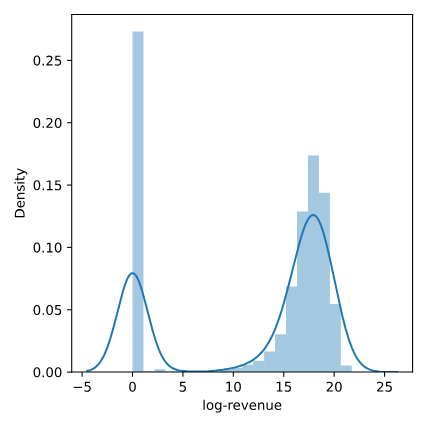

### Predicting movie revenue

Let's begin the challenge of predicting movie revenue by building a simple linear regression to estimate the log-revenue of movies based on the 'budget' feature. The metric you will use here is the RMSE (root mean squared error). To calculate this using scikit-learn, you can use the mean_squared_error() function from the sklearn.metrics module and then take its square root using numpy.

The movies dataset has been loaded for you and split into train and test sets. Additionally, the missing values have been replaced with zeros. We also standardized the input feature by using StandardScaler(). Check out DataCamp's courses on cleaning data and feature engineering if you want to learn more about preprocessing for machine learning.

Instructions

Instantiate the default LinearRegression model.
Calculate the predictions on the test set.
Calculate the RMSE. The mean_squared_error() function requires two arguments: y_test, followed by the predictions.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Build and fit linear regression model
reg_lm = LinearRegression()
reg_lm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_lm.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

# <script.py> output:
#     RMSE: 7.335

RMSE: 0.210


### Boosting for predicted revenue

The initial model got an RMSE of around 7.34. Let's see if we can improve this using an iteration of boosting.

You'll build another linear regression, but this time the target values are the errors from the base model, calculated as follows:

y_train_error = pred_train - y_train
y_test_error = pred_test - y_test
For this model you'll use 'popularity' feature instead, hoping that it can provide more informative patterns than with the 'budget' feature alone. This is available to you as X_train_pop and X_test_pop. As in the previous exercise, the input features have been standardized for you.

Instructions

Fit a linear regression model to the previous errors using X_train_pop and y_train_error.
Calculate the predicted errors on the test set, X_test_pop.
Calculate the RMSE, like in the previous exercise, using y_test_error and pred_error.

In [ ]:
# Fit a linear regression model to the previous errors
reg_error = LinearRegression()
reg_error.fit(X_train_pop, y_train_error)

# Calculate the predicted errors on the test set
pred_error = reg_error.predict(X_test_pop)

# Evaluate the updated performance
rmse_error = np.sqrt(mean_squared_error(y_test_error, pred_error))
print('RMSE: {:.3f}'.format(rmse_error))

### Your first AdaBoost model

In the previous lesson you built models to predict the log-revenue of movies. You started with a simple linear regression and got an RMSE of 7.34. Then, you tried to improve it with an iteration of boosting, getting to a lower RMSE of 7.28.

In this exercise, you'll build your first AdaBoost model - an AdaBoostRegressor - in an attempt to improve performance even further.

The movies dataset has been loaded and split into train and test sets. Here you'll be using the 'budget' and 'popularity' features, which were already standardized for you using StandardScaler() from sklearn.preprocessing module.

Instructions

Instantiate the default linear regression model.
Build and fit an AdaBoostRegressor, using the linear regression as the base model and 12 estimators.
Calculate the predictions on the test set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate the default linear regression model
reg_lm = LinearRegression()

# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(base_estimator=reg_lm, n_estimators=12, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))


# <script.py> output:
#     RMSE: 7.179

### Tree-based AdaBoost regression

AdaBoost models are usually built with decision trees as the base estimators. Let's give this a try now and see if model performance improves even further.

We'll use twelve estimators as before to have a fair comparison. There's no need to instantiate the decision tree as it is the base estimator by default.

Instructions


Build and fit an AdaBoostRegressor using 12 estimators. You do not have to specify a base estimator.
Calculate the predictions on the test set.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Build and fit a tree-based AdaBoost regressor
reg_ada = AdaBoostRegressor(n_estimators=12, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))


# <script.py> output:
#     RMSE: 5.443

### Making the most of AdaBoost

As you have seen, for predicting movie revenue, AdaBoost gives the best results with decision trees as the base estimator.

In this exercise, you'll specify some parameters to extract even more performance. In particular, you'll use a lower learning rate to have a smoother update of the hyperparameters. Therefore, the number of estimators should increase. Additionally, the following features have been added to the data: 'runtime', 'vote_average', and 'vote_count'.

Instructions


Build an AdaBoostRegressor using 100 estimators and a learning rate of 0.01.
Fit reg_ada to the training set and calculate the predictions on the test set.

In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Build and fit an AdaBoost regressor with 100 estimators and a learning rate of 0.01
reg_ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

# <script.py> output:
#     RMSE: 5.150


RMSE: 0.130


### Sentiment analysis with GBM

Let's now use scikit-learn's GradientBoostingClassifier on the reviews dataset to predict the sentiment of a review given its text.

We will not pass the raw text as input for the model. The following pre-processing has been done for you:

Remove reviews with missing values.
Select data from the top 5 apps.
Select a random subsample of 500 reviews.
Remove "stop words" from the reviews.
Transform the reviews into a matrix, in which each feature represents the frequency of a word in a review.
Do you want a deeper understanding of text mining? Then go check the course Introduction to Natural Language Processing in Python!

Instructions

Build a GradientBoostingClassifier with 100 estimators and a learning rate of 0.1.
Calculate the predictions on the test set.
Compute the accuracy to evaluate the model.
Calculate and print the confusion matrix.

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Build and fit a Gradient Boosting classifier
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=500)
clf_gbm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_gbm.predict(X_test)

# Evaluate the performance based on the accuracy
acc = accuracy_score(y_test, pred)
print('Accuracy: {:.3f}'.format(acc))

# Get and show the Confusion Matrix
cm = confusion_matrix(y_test, pred)
print(cm)


# <script.py> output:
#     Accuracy: 0.920
#     [[29  0  5]
#      [ 0  2  1]
#      [ 2  0 61]]

Accuracy: 0.969
[[147   3]
 [  2   8]]


### Movie revenue prediction with CatBoost

Let's finish up this chapter on boosting by returning to the movies dataset! In this exercise, you'll build a CatBoostRegressor to predict the log-revenue. Remember that our best model so far is the AdaBoost model with a RMSE of 5.15.

Will CatBoost beat AdaBoost? We'll try to use a similar set of parameters to have a fair comparison.

Recall that these are the features we have used so far: 'budget', 'popularity', 'runtime', 'vote_average', and 'vote_count'. catboost has been imported for you as cb.

Instructions

Build and fit a CatBoostRegressor using 100 estimators, a learning rate of 0.1, and a max depth of 3.
Calculate the predictions for the test set and print the RMSE.

In [ ]:
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Build and fit a CatBoost regressor
reg_cat = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=500)
reg_cat.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_cat.predict(X_test)

# Evaluate the performance using the RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE (CatBoost): {:.3f}'.format(rmse_cat))


# <script.py> output:
#     0:	learn: 7.6907203	total: 46.4ms	remaining: 4.59s
#     1:	learn: 7.3007402	total: 46.9ms	remaining: 2.3s
#     2:	learn: 6.9617614	total: 47.4ms	remaining: 1.53s
#     3:	learn: 6.6581011	total: 47.9ms	remaining: 1.15s
#     4:	learn: 6.4042777	total: 48.4ms	remaining: 920ms
#     5:	learn: 6.1917616	total: 48.9ms	remaining: 767ms
#     6:	learn: 6.0184946	total: 49.4ms	remaining: 657ms
#     7:	learn: 5.8619630	total: 50ms	remaining: 574ms
#     8:	learn: 5.7238913	total: 50.5ms	remaining: 510ms
#     9:	learn: 5.6222347	total: 51ms	remaining: 459ms
#     10:	learn: 5.5264312	total: 51.5ms	remaining: 417ms
#     11:	learn: 5.4410032	total: 52ms	remaining: 381ms
#     12:	learn: 5.3740283	total: 52.5ms	remaining: 351ms
#     13:	learn: 5.3179790	total: 53ms	remaining: 325ms
#     14:	learn: 5.2642995	total: 53.5ms	remaining: 303ms
#     15:	learn: 5.2250755	total: 54ms	remaining: 283ms
#     16:	learn: 5.1923227	total: 54.5ms	remaining: 266ms
#     17:	learn: 5.1634952	total: 54.9ms	remaining: 250ms
#     18:	learn: 5.1402165	total: 55.4ms	remaining: 236ms
#     19:	learn: 5.1142076	total: 55.9ms	remaining: 224ms
#     20:	learn: 5.0938207	total: 56.4ms	remaining: 212ms
#     21:	learn: 5.0786519	total: 56.9ms	remaining: 202ms
#     22:	learn: 5.0627297	total: 57.4ms	remaining: 192ms
#     23:	learn: 5.0512657	total: 57.9ms	remaining: 183ms
#     24:	learn: 5.0409775	total: 58.4ms	remaining: 175ms
#     25:	learn: 5.0312806	total: 58.9ms	remaining: 168ms
#     26:	learn: 5.0219800	total: 59.4ms	remaining: 160ms
#     27:	learn: 5.0136052	total: 59.8ms	remaining: 154ms
#     28:	learn: 5.0066007	total: 60.3ms	remaining: 148ms
#     29:	learn: 5.0002061	total: 60.8ms	remaining: 142ms
#     30:	learn: 4.9938356	total: 61.2ms	remaining: 136ms
#     31:	learn: 4.9891673	total: 61.7ms	remaining: 131ms
#     32:	learn: 4.9849912	total: 62.2ms	remaining: 126ms
#     33:	learn: 4.9818629	total: 62.6ms	remaining: 122ms
#     34:	learn: 4.9769315	total: 63.1ms	remaining: 117ms
#     35:	learn: 4.9734819	total: 63.6ms	remaining: 113ms
#     36:	learn: 4.9706818	total: 64ms	remaining: 109ms
#     37:	learn: 4.9667811	total: 64.6ms	remaining: 105ms
#     38:	learn: 4.9635038	total: 65ms	remaining: 102ms
#     39:	learn: 4.9614684	total: 65.5ms	remaining: 98.2ms
#     40:	learn: 4.9598851	total: 65.9ms	remaining: 94.9ms
#     41:	learn: 4.9563059	total: 66.4ms	remaining: 91.7ms
#     42:	learn: 4.9546486	total: 66.8ms	remaining: 88.6ms
#     43:	learn: 4.9534317	total: 67.3ms	remaining: 85.6ms
#     44:	learn: 4.9527290	total: 67.7ms	remaining: 82.8ms
#     45:	learn: 4.9515974	total: 68.2ms	remaining: 80ms
#     46:	learn: 4.9491063	total: 68.7ms	remaining: 77.4ms
#     47:	learn: 4.9473837	total: 69.1ms	remaining: 74.9ms
#     48:	learn: 4.9436646	total: 69.6ms	remaining: 72.4ms
#     49:	learn: 4.9428917	total: 70ms	remaining: 70ms
#     50:	learn: 4.9416607	total: 70.5ms	remaining: 67.7ms
#     51:	learn: 4.9401623	total: 70.9ms	remaining: 65.5ms
#     52:	learn: 4.9393256	total: 71.3ms	remaining: 63.3ms
#     53:	learn: 4.9387984	total: 71.8ms	remaining: 61.1ms
#     54:	learn: 4.9367738	total: 72.3ms	remaining: 59.1ms
#     55:	learn: 4.9340331	total: 72.7ms	remaining: 57.1ms
#     56:	learn: 4.9315110	total: 73.2ms	remaining: 55.2ms
#     57:	learn: 4.9290670	total: 73.7ms	remaining: 53.3ms
#     58:	learn: 4.9284069	total: 74.1ms	remaining: 51.5ms
#     59:	learn: 4.9276722	total: 74.5ms	remaining: 49.7ms
#     60:	learn: 4.9272245	total: 74.9ms	remaining: 47.9ms
#     61:	learn: 4.9264551	total: 75.4ms	remaining: 46.2ms
#     62:	learn: 4.9258886	total: 75.9ms	remaining: 44.6ms
#     63:	learn: 4.9243086	total: 76.3ms	remaining: 42.9ms
#     64:	learn: 4.9225200	total: 76.8ms	remaining: 41.3ms
#     65:	learn: 4.9199979	total: 77.2ms	remaining: 39.8ms
#     66:	learn: 4.9187091	total: 77.7ms	remaining: 38.3ms
#     67:	learn: 4.9180491	total: 78.2ms	remaining: 36.8ms
#     68:	learn: 4.9154203	total: 78.6ms	remaining: 35.3ms
#     69:	learn: 4.9144691	total: 79.1ms	remaining: 33.9ms
#     70:	learn: 4.9141659	total: 79.5ms	remaining: 32.5ms
#     71:	learn: 4.9136370	total: 79.9ms	remaining: 31.1ms
#     72:	learn: 4.9120578	total: 80.4ms	remaining: 29.7ms
#     73:	learn: 4.9110179	total: 80.8ms	remaining: 28.4ms
#     74:	learn: 4.9097900	total: 81.2ms	remaining: 27.1ms
#     75:	learn: 4.9088271	total: 81.7ms	remaining: 25.8ms
#     76:	learn: 4.9082645	total: 82.1ms	remaining: 24.5ms
#     77:	learn: 4.9073784	total: 82.5ms	remaining: 23.3ms
#     78:	learn: 4.9054126	total: 83ms	remaining: 22.1ms
#     79:	learn: 4.9041859	total: 83.4ms	remaining: 20.9ms
#     80:	learn: 4.9038452	total: 83.8ms	remaining: 19.7ms
#     81:	learn: 4.9033286	total: 84.2ms	remaining: 18.5ms
#     82:	learn: 4.9024389	total: 84.7ms	remaining: 17.3ms
#     83:	learn: 4.9016633	total: 85.1ms	remaining: 16.2ms
#     84:	learn: 4.8993908	total: 85.5ms	remaining: 15.1ms
#     85:	learn: 4.8988986	total: 85.9ms	remaining: 14ms
#     86:	learn: 4.8976443	total: 86.4ms	remaining: 12.9ms
#     87:	learn: 4.8958643	total: 86.8ms	remaining: 11.8ms
#     88:	learn: 4.8950438	total: 87.2ms	remaining: 10.8ms
#     89:	learn: 4.8927841	total: 87.7ms	remaining: 9.74ms
#     90:	learn: 4.8899605	total: 88.1ms	remaining: 8.72ms
#     91:	learn: 4.8890892	total: 88.6ms	remaining: 7.7ms
#     92:	learn: 4.8869003	total: 89ms	remaining: 6.7ms
#     93:	learn: 4.8858148	total: 89.4ms	remaining: 5.71ms
#     94:	learn: 4.8826237	total: 89.8ms	remaining: 4.73ms
#     95:	learn: 4.8801529	total: 90.3ms	remaining: 3.76ms
#     96:	learn: 4.8785101	total: 90.7ms	remaining: 2.81ms
#     97:	learn: 4.8761696	total: 91.2ms	remaining: 1.86ms
#     98:	learn: 4.8742715	total: 91.6ms	remaining: 925us
#     99:	learn: 4.8737823	total: 92ms	remaining: 0us
#     RMSE (CatBoost): 5.115

### Boosting contest: Light vs Extreme

While the performance of the CatBoost model is relatively good, let's try two other flavors of boosting and see which performs better: the "Light" or the "Extreme" approach.

CatBoost is highly recommended when there are categorical features. In this case, all features are numeric, therefore one of the other approaches might produce better results.

As we are building regressors, we'll use an additional parameter, objective, which specifies the learning function to be used. To apply a squared error, we'll set objective to 'reg:squarederror' for XGBoost and 'mean_squared_error' for LightGBM.

In addition, we'll specify the parameter n_jobs for XGBoost to improve its computation runtime.

Instructions

Build an XGBRegressor using the parameters: max_depth = 3, learning_rate = 0.1, n_estimators = 100, and n_jobs=2.
Build an LGBMRegressor using the parameters: max_depth = 3, learning_rate = 0.1, and n_estimators = 100.

In [ ]:
from xgboost import XGBRegressor
import lightgbm as lgb

# Build and fit an XGBoost regressor
reg_xgb = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, n_jobs=2, objective='reg:squarederror', random_state=500)
reg_xgb.fit(X_train, y_train)

# Build and fit a LightGBM regressor
reg_lgb = lgb.LGBMRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, objective='mean_squared_error', seed=500)
reg_lgb.fit(X_train, y_train)

# Calculate the predictions and evaluate both regressors
pred_xgb = reg_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
pred_lgb = reg_lgb.predict(X_test)
rmse_lgb = np.sqrt(mean_squared_error(y_test, pred_lgb))

print('Extreme: {:.3f}, Light: {:.3f}'.format(rmse_xgb, rmse_lgb))


# <script.py> output:
#     [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
#     You can set `force_col_wise=true` to remove the overhead.
#     [LightGBM] [Info] Total Bins 904
#     [LightGBM] [Info] Number of data points in the train set: 3842, number of used features: 5
#     [LightGBM] [Info] Start training from score 12.266868
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
#     Extreme: 5.122, Light: 5.142





## **Chapter 4 - Stacking**

Get ready to see how things stack up! In this final chapter you'll learn about the stacking ensemble method. You'll learn how to implement it using scikit-learn as well as with the mlxtend library! You'll apply stacking to predict the edibility of North American mushrooms, and revisit the ratings of Google apps with this more advanced approach.



### Predicting mushroom edibility

Now that you have explored the data, it's time to build a first model to predict mushroom edibility.

The dataset is available to you as mushrooms. As both the features and the target are categorical, these have been transformed into "dummy" binary variables for you.

Let's begin with Naive Bayes (using scikit-learn's GaussianNB) and see how this algorithm performs on this problem.

Instructions

Instantiate a GaussianNB classifier called clf_nb.
Fit clf_nb to the training data X_train and y_train.
Calculate the predictions on the test set. These predictions will be used to evaluate the performance using the accuracy score.

In [61]:
from sklearn.naive_bayes import GaussianNB

# Instantiate a Naive Bayes classifier
clf_nb = GaussianNB()

# Fit the model to the training set
clf_nb.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_nb.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))


Accuracy: 0.9250


### K-nearest neighbors for mushrooms

The Gaussian Naive Bayes classifier did a really good job for being an initial model. Let's now build a new model to compare it against the Naive Bayes.

In this case, the algorithm to use is a 5-nearest neighbors classifier. As the dummy features create a high-dimensional dataset, use the Ball Tree algorithm to make the model faster. Let's see how this model performs!

Instructions

Build a KNeighborsClassifier with 5 neighbors and algorithm = 'ball_tree' (to expedite the processing).
Fit the model to the training data.
Evaluate the performance on the test set using the accuracy score.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a 5-nearest neighbors classifier with 'ball_tree' algorithm
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Fit the model to the training set
clf_knn.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_knn.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))


Accuracy: 0.9688


### Applying stacking to predict app ratings

In this exercise you'll start building your first Stacking ensemble. The dataset you'll use is the first one we used in Chapter 1. If you recall, the objective is to predict the rating of each app (from 1 to 5). The input features we use are: Reviews, Size, Installs, Type, Price, and Content Rating.

We already did step 1: prepare the dataset. It is available to you as apps. We cleaned the required features and replaced missing values with zeros.

Now, you'll work on step 2: build the first-layer estimators.

Instructions

Build and fit a decision tree classifier with: min_samples_leaf: 3 and min_samples_split: 9.
Build and fit a 5-nearest neighbors classifier using: algorithm: 'ball_tree' (to expedite the processing).
Evaluate the performance of each estimator using the accuracy score on the test set.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Build and fit a Decision Tree classifier
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf_dt.fit(X_train, y_train)

# Build and fit a 5-nearest neighbors classifier using the 'Ball-Tree' algorithm
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf_knn.fit(X_train, y_train)

# Evaluate the performance using the accuracy score
print('Decision Tree: {:0.4f}'.format(accuracy_score(y_test, clf_dt.predict(X_test))))
print('5-Nearest Neighbors: {:0.4f}'.format(accuracy_score(y_test, clf_knn.predict(X_test))))


Decision Tree: 0.9688
5-Nearest Neighbors: 0.9688


### Building the stacking classifier

Now you'll work on the next two steps.

Step 3: Append the predictions to the dataset: this is internally handled by the StackingClassifier class, but we'll do our part by preparing the list of first-level classifiers, which you built in the previous exercise. These are available as: clf_dt and clf_knn.

Step 4: Build the second-layer meta estimator: for this purpose you'll use the default LogisticRegression. This will take as input features the individual predictions from the base estimators.

With both levels of estimators ready you can build the stacking classifier.

Instructions

Prepare the list of tuples with the first-layer classifiers: clf_dt and clf_knn (specifying the appropriate labels and order).
Instantiate the second-layer meta estimator: a LogisticRegression.
Build the stacking classifier passing: the list of tuples, the meta classifier, with stack_method='predict_proba' (to use class probabilities), and passthrough = False (to only use predictions as features).

In [ ]:
# Prepare the list of tuples with the first-layer classifiers
classifiers = [
	('clf_dt', clf_dt),
    ('clf_knn', clf_knn)
]

# Instantiate the second-layer meta estimator
clf_meta = LogisticRegression()

# Build the stacking classifier
clf_stack = StackingClassifier(
   estimators=classifiers,
   final_estimator=clf_meta,
   stack_method='predict_proba',
   passthrough=False)

### Stacked predictions for app ratings

Once the stacking estimator is built you can fit it to the training set. Then, it will be ready for step 5: use the stacked ensemble for predictions.

The stacking classifier is available to you as clf_stack.

Let's obtain the final predictions and see if there is any improvement in performance thanks to stacking.

Instructions

Fit the stacking classifier on the training set.
Calculate the final predictions from the stacking estimator on the test set.
Evaluate the performance on the test set using the accuracy score.

In [ ]:
# Fit the stacking classifier to the training set
clf_stack.fit(X_train, y_train)

# Obtain the final predictions from the stacking classifier
pred_stack = clf_stack.predict(X_test)

# Evaluate the new performance on the test set
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, pred_stack)))


# <script.py> output:
#     Accuracy: 0.6424

### A first attempt with mlxtend

It's time to start working with mlxtend! You'll continue using the app ratings dataset. As you have already built a stacked ensemble model using scikit-learn, you have a basis to compare with the model you'll now build with mlxtend.

The dataset is loaded and available to you as apps.

Let's see if mlxtend can build a model as good as or better than the scikit-learn ensemble classifier.

Instructions

Instantiate a decision tree classifier with min_samples_leaf = 3 and min_samples_split = 9.
Instantiate a 5-nearest neighbors classifier using the 'ball_tree' algorithm.
Build a StackingClassifier passing: the list of classifiers, the meta classifier, use_probas=True (to use probabilities), and use_features_in_secondary = False (to only use the individual predictions).
Evaluate the performance by computing the accuracy score.

In [ ]:
# Instantiate the first-layer classifiers
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Instantiate the second-layer meta classifier
clf_meta = LogisticRegression()

# Build the Stacking classifier
clf_stack = StackingClassifier(classifiers=[clf_dt, clf_knn], meta_classifier=clf_meta, use_probas=True, use_features_in_secondary=False)
clf_stack.fit(X_train, y_train)

# Evaluate the performance of the Stacking classifier
pred_stack = clf_stack.predict(X_test)
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred_stack)))



# <script.py> output:
#     Accuracy: 0.6050

# <script.py> output:
#     Accuracy: 0.6050

### Back to regression with stacking

In Chapter 1, we treated the app ratings as a regression problem, predicting the rating on the interval from 1 to 5. So far in this chapter, we have dealt with it as a classification problem, rounding the rating to the nearest integer. To practice using the StackingRegressor, we'll go back to the regression approach. As usual, the input features have been standardized for you with a StandardScaler().

The MAE (mean absolute error) is the evaluation metric. In Chapter 1, the MAE was around 0.61. Let's see if the stacking ensemble method can reduce that error.

Instructions

Instantiate a decision tree regressor with: min_samples_leaf = 11 and min_samples_split = 33.
Instantiate the default linear regression.
Instantiate a Ridge regression model with random_state = 500.
Build and fit a StackingRegressor, passing the regressors and the meta_regressor.

In [68]:
from mlxtend.regressor import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

# Instantiate the 1st-layer regressors
reg_dt = DecisionTreeRegressor(min_samples_leaf=11, min_samples_split=33, random_state=500)
reg_lr = LinearRegression()
reg_ridge = Ridge(random_state=500)

# Instantiate the 2nd-layer regressor
reg_meta = LinearRegression()

# Build the Stacking regressor
reg_stack = StackingRegressor(regressors=[reg_dt, reg_lr, reg_ridge], 
                               meta_regressor=reg_meta)

# Fit the stacking regressor to the training set
reg_stack.fit(X_train, y_train)

# Evaluate the performance on the test set using the MAE metric
pred = reg_stack.predict(X_test)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, pred)))


MAE: 0.038


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


### Mushrooms: a matter of life or death

Let's conclude the course by revisiting the mushroom edibility problem. You'll try the stacking classifier to see if the score can be improved. As stacking uses a meta-estimator (second layer classifier) which attempts to correct predictions from the first layer, some of the misclassified instances could be corrected. This is a very important problem, as the edibility of a mushroom is a matter of life or death.

The dataset has been loaded and split into train and test sets. Do you think stacking can help to predict the edibility of a mushroom with greater confidence?

Instructions

Instantiate the first-layer estimators: a 5-nearest neighbors using the ball tree algorithm, a decision tree classifier with parameters min_samples_leaf = 5 and min_samples_split = 15, and a Gaussian Naive Bayes classifier.
Build and fit a stacking classifier, using the parameters classifiers - a list containing the first-layer classifiers - and meta_classifier - the default logistic regression.

In [71]:
# Create the first-layer models
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf_dt = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=15, random_state=500)
clf_nb = GaussianNB()

# Create the second-layer model (meta-model)
clf_lr = LogisticRegression()

# Create and fit the stacked model
clf_stack = StackingClassifier(classifiers=[clf_knn, clf_dt, clf_nb], meta_classifier=clf_lr)
clf_stack.fit(X_train, y_train)

# Evaluate the stacked model’s performance
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, clf_stack.predict(X_test))))

Accuracy: 0.9688
